# Training and Tuning Predictive Models

In [ ]:
!jupyter nbconvert --to html few_models.ipynb

### Prepare the data

In [22]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')
import warnings
warnings.filterwarnings('ignore')


In [23]:
x_train = pd.read_csv('X_train.csv').iloc[:,1:]
x_test = pd.read_csv('X_valid.csv').iloc[:,1:]
y_train = pd.read_csv('y_train.csv').iloc[:,1:]
y_test = pd.read_csv('y_valid.csv').iloc[:,1:]

#### Decision Tree

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# Create a decision tree and train
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 1.0
Rsquared on Testing 0.6176999225755886


#### Decision Tree Tuning

In [5]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'max_depth': np.arange(1,100,5)}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Print the Rsquared on training and testing
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Best parameters are: {'max_depth': 6}
Rsquared on Training 0.8235772077938193
Rsquared on Testing 0.7170904647558012


#### AdaBoost

In [6]:
from sklearn.ensemble import AdaBoostRegressor

# Create a decision tree and train
model = AdaBoostRegressor()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.061125604808840106
Rsquared on Testing 0.4591623124741959


#### Adaboost Tuning

In [7]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'n_estimators': np.arange(50,100, 5), 'learning_rate':np.linspace(0.001,.2,5)}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(AdaBoostRegressor(), param_grid, cv = 3)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Print the Rsquared on training and testing
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Best parameters are: {'learning_rate': 0.05075, 'n_estimators': 60}
Rsquared on Training 0.7157576442323954
Rsquared on Testing 0.7359690287043726


#### Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Create a decision tree and train
model = RandomForestRegressor()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.9557035508541831
Rsquared on Testing 0.7758716255154877


#### Random Forest Tuning

In [9]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'n_estimators': np.arange(50,100, 5), 'max_features':np.arange(2,10)}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(RandomForestRegressor(), param_grid, cv = 3)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Print the Rsquared on training and testing
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Best parameters are: {'max_features': 9, 'n_estimators': 70}
Rsquared on Training 0.9371917245901695
Rsquared on Testing 0.6334379128187273


#### Gradient Boosting

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a decision tree and train
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.8717278002706266
Rsquared on Testing 0.7936213233634128


#### Gradient Boosting Tuning

In [11]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'n_estimators': np.arange(50,100, 5), 'learning_rate':np.linspace(0.001,.2,5)}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Print the Rsquared on training and testing
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Best parameters are: {'learning_rate': 0.1005, 'n_estimators': 70}
Rsquared on Training 0.8489119840933748
Rsquared on Testing 0.8094880179627664


#### ElasticNet

In [12]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.6308324655303715
Rsquared on Testing 0.7083867549966092


#### ElasticNet Tuning

In [13]:
param_grid = {'alpha':np.linspace(0,10, 10), 'l1_ratio':np.linspace(0,1,10)}
model = GridSearchCV(ElasticNet(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Print the Rsquared on training and testing
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Best parameters are: {'alpha': 1.1111111111111112, 'l1_ratio': 0.8888888888888888}
Rsquared on Training 0.6571211783271504
Rsquared on Testing 0.7170309395631529


#### KNN

In [14]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.6688856014236269
Rsquared on Testing 0.5987641198971616


#### KNN Tuning

In [15]:
param_grid = {'n_neighbors':np.arange(10,20)}
model = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 3)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Print the Rsquared on training and testing
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Best parameters are: {'n_neighbors': 13}
Rsquared on Training 0.5956103204157177
Rsquared on Testing 0.6328068318400353


## Neural Network

In [16]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10, 20))
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.549450112716284
Rsquared on Testing 0.6577945707591298


In [21]:
!jupyter nbconvert --to html test.ipynb

[NbConvertApp] Converting notebook test.ipynb to html
[NbConvertApp] Writing 568978 bytes to test.html


# Permutation Feature Importance

### Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a decision tree and train
model = GradientBoostingRegressor(learning_rate=0.1005, n_estimators=70)
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.8489119840933748
Rsquared on Testing 0.8090349042925934


In [141]:
sorted_idx = (-result.importances_mean).argsort()
feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':result.importances_mean[sorted_idx], 'std':result.importances_std[sorted_idx]})

<AxesSubplot:ylabel='Variables'>

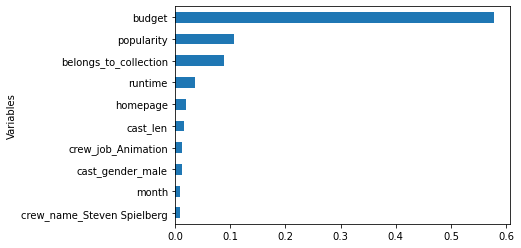

In [142]:
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

### Random Forest

<AxesSubplot:ylabel='Variables'>

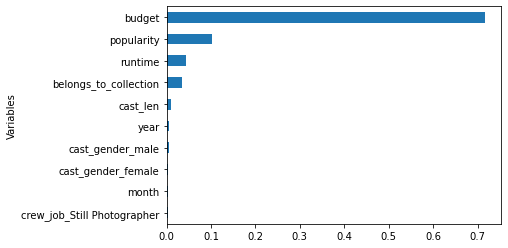

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Create a decision tree and train
model = RandomForestRegressor()
model.fit(x_train, y_train)
result = permutation_importance(model, x_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = (-result.importances_mean).argsort()
feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':result.importances_mean[sorted_idx], 'std':result.importances_std[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

### Random Forest Feature Importance

<AxesSubplot:ylabel='Variables'>

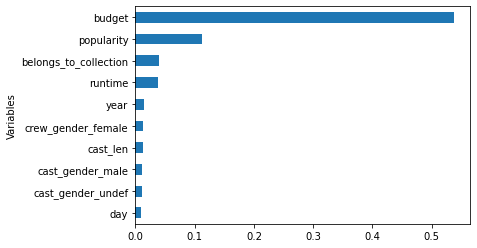

In [153]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
sorted_idx = (-model.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':model.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

### Gradient Boosting Feature Importance

<AxesSubplot:ylabel='Variables'>

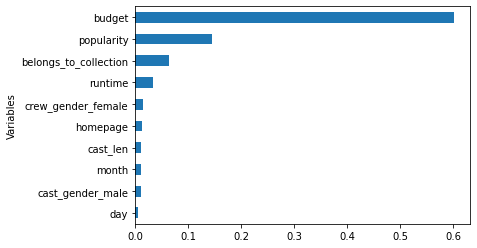

In [152]:
model = GradientBoostingRegressor(learning_rate=0.1005, n_estimators=70)
model.fit(x_train, y_train)
sorted_idx = (-model.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':model.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)



## Visualization

In [90]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

x_train = pd.read_csv('X_train.csv').iloc[:,1:]
x_test = pd.read_csv('X_valid.csv').iloc[:,1:]
y_train = pd.read_csv('y_train.csv').iloc[:,1:]
y_test = pd.read_csv('y_valid.csv').iloc[:,1:]

d1 = pd.concat([x_train, y_train], axis=1)
d2 = pd.concat([x_test, y_test], axis=1)
df = pd.concat([d1, d2], axis=0, ignore_index=True)

In [91]:
d1 = d.groupby('month', as_index=False).agg({'revenue':'mean'})
import calendar
d1['Month'] = d1['month'].apply(lambda x: calendar.month_abbr[x])

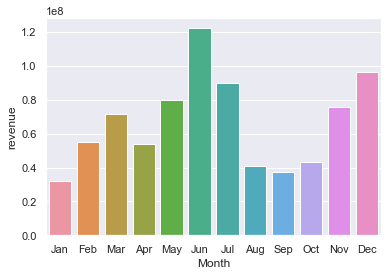

In [92]:
s1 = sns.barplot(x='Month', y="revenue", data=d1, order=d1['Month'])
plt.savefig("output.png")

## Cluster Analysis 

#### Kmeans clustering

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
df['Cluster']= kmeans.predict(df)

In [94]:
df.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'popularity', 'runtime',
       'genres_Drama', 'genres_Comedy', 'genres_Thriller', 'genres_Action',
       'genres_Romance',
       ...
       'crew_department_Directing', 'crew_department_Editing',
       'crew_department_Visual Effects', 'crew_department_Lighting',
       'crew_department_Actors', 'crew_gender_undef', 'crew_gender_male',
       'crew_gender_female', 'revenue', 'Cluster'],
      dtype='object', length=260)

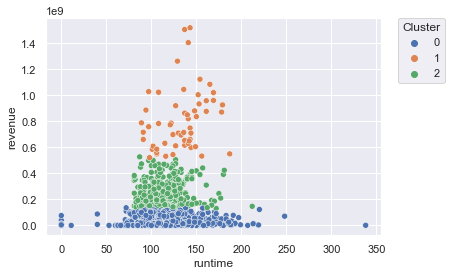

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="revenue", x='runtime', hue='Cluster', palette="deep")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cluster")

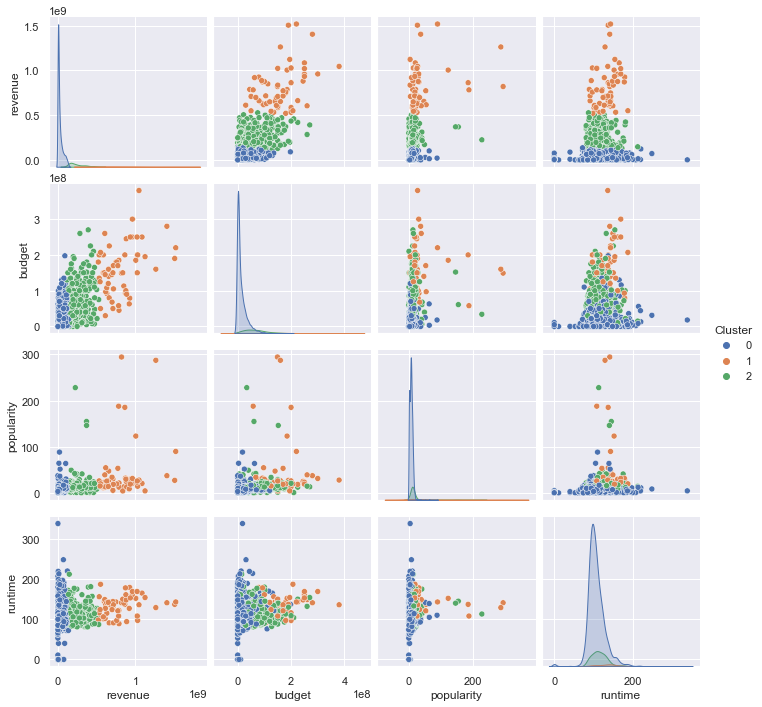

In [111]:
sns.color_palette("pastel")
df1 = df[['revenue', 'budget','popularity', 'runtime','Cluster']]
sns.pairplot(df1, hue="Cluster", palette="deep")

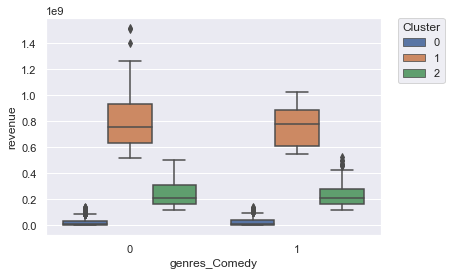

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
ax = sns.boxplot(x="genres_Comedy", y='revenue',data=df, hue='Cluster', palette="deep")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cluster")

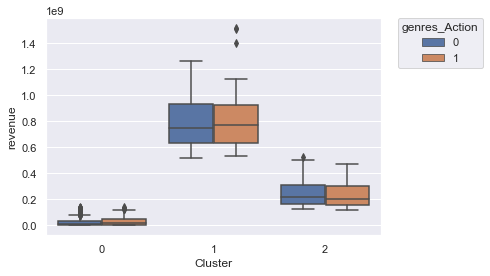

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
ax = sns.boxplot(x="Cluster", y='revenue',data=df, hue='genres_Action')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="genres_Action")

In [112]:
!jupyter nbconvert --to html few_models.ipynb

[NbConvertApp] Converting notebook few_models.ipynb to html
[NbConvertApp] Writing 993311 bytes to few_models.html
